# Modelagem

# Pontos



In [5]:
#Verificar quais colunas serão necessárias. 
#Organizar o dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
my_df = pd.read_parquet('../2_Dados/Modelagem.parquet.gzip', engine='pyarrow')
my_df.head()

,diabetes,pressao_alta,colesterol_alto,testou_colesterol,IMC,fumante,AVC,ataque_cardiaco,ativ_fisica,consome_frutas,...,seguro_saude,n_foi_med_custo,auto_aval_saude,saude_mental,saude_fisica,dif_escadas,sexo,class_idade,class_educ,class_renda
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [8]:
my_df.shape

(253680, 22)

In [9]:
# my_df.columns

In [10]:
my_df = my_df[['pressao_alta', 'colesterol_alto',
       'IMC', 'fumante', 'ataque_cardiaco', 'ativ_fisica',
       'consome_frutas', 'consome_vegetais', 'consumo_alcool', 'auto_aval_saude', 'saude_fisica',
       'dif_escadas', 'sexo','diabetes']]

In [11]:
# my_df.head(5)

In [12]:
# my_df.info()

#Separando os dados

In [13]:
target_name = 'diabetes'
X = my_df.drop('diabetes', axis=1)
y = my_df[target_name]

In [14]:

y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: diabetes, Length: 253680, dtype: int64

#Transformando os dados.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X = scaler.fit_transform(X)
X

array([[1.        , 1.        , 0.3255814 , ..., 0.5       , 1.        ,
        0.        ],
       [0.        , 0.        , 0.15116279, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.18604651, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.18604651, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.12790698, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.15116279, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.3
       ,random_state = 123
       ,stratify = y
)

#### **Treinando o algoritmo de arvore de decisão.**

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

###Extrair as características mais importantes

In [22]:
importances = dtree.feature_importances_
feat_names = my_df.drop(['diabetes'],axis=1).columns

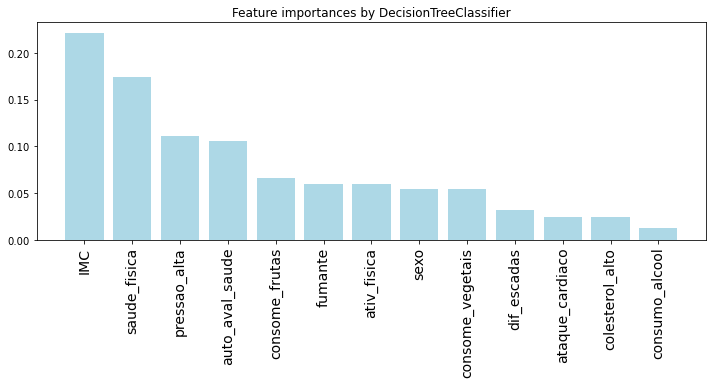

In [23]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_train,y_train)
importancias = forest.feature_importances_

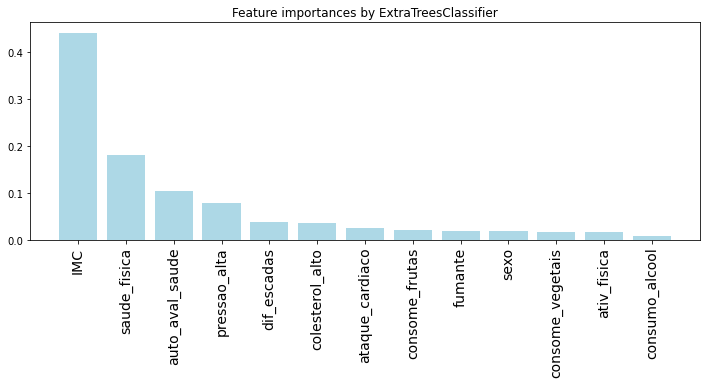

In [26]:
indices = np.argsort(importancias)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by ExtraTreesClassifier")
plt.bar(range(len(indices)), importancias[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [27]:
# X = my_df[["IMC","saude_fisica","pressao_alta","auto_aval_saude"]]
X = my_df[["IMC","saude_fisica","pressao_alta","auto_aval_saude","consome_frutas","ativ_fisica","fumante","consome_vegetais"]]

In [28]:
scaler = MinMaxScaler()

In [29]:
X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_Test = train_test_split(
        X
       ,y
       ,test_size = 0.3
       ,random_state = 123
       ,stratify = y
)

In [31]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

###**Importando métodos de métrica de avaliação.**

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [34]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

###**Análise do modelo de baseline**

In [35]:
y_predict = base_rate_model(X_test)

In [36]:
accuracy_result(y_Test, y_predict)

Accuracy = 0.86


In [37]:
roc_classification_report_results("Base Model", y_Test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     65500
           1       0.00      0.00      0.00     10604

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Modelo de Regressão Logística.**

#### **Instânciando o algoritmo.**

In [38]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### **Realizando o treinamento.**

In [39]:
logis.fit(X_train, y_train)

LogisticRegression()

#### **Calculando as predições.**

In [40]:
y_predict = logis.predict(X_test)

###**Avaliando o resultado.**

In [41]:
accuracy_result(y_Test, y_predict)

Accuracy = 0.86


In [42]:
roc_classification_report_results("Logistic Regression", y_Test, y_predict)


Logistic Regression AUC = 0.5447707418488199

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     65500
           1       0.52      0.11      0.18     10604

    accuracy                           0.86     76104
   macro avg       0.69      0.54      0.55     76104
weighted avg       0.82      0.86      0.82     76104



### **Modelo de Arvore de decisão.**

#### **Instânciando o algoritmo.**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### **Realizando o treinamento.**

In [44]:
dtree = dtree.fit(X_train,y_train)

#### **Calculando as predições.**

In [45]:
y_predict = dtree.predict(X_test)

#### **Avaliando o resultado.**

In [46]:
accuracy_result(y_Test, y_predict)

Accuracy = 0.85


In [47]:
roc_classification_report_results("Decision Tree", y_Test, y_predict)


Decision Tree AUC = 0.5526141078838174

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     65500
           1       0.37      0.15      0.21     10604

    accuracy                           0.85     76104
   macro avg       0.62      0.55      0.56     76104
weighted avg       0.80      0.85      0.82     76104



### **Modelo de Arvore Aleatória (Random Forest)**

###**Instânciando o algoritmo.**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

#### **Realizando o treinamento.**

In [50]:
rf = rf.fit(X_train,y_train)

###**Calculando as predições.**

In [51]:
y_predict = rf.predict(X_test)

#### **Avaliando o resultado.**

In [52]:
accuracy_result(y_Test, y_predict)

Accuracy = 0.85


In [53]:
roc_classification_report_results("Random Forest", y_Test, y_predict)


Random Forest AUC = 0.5605837376648881

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     65500
           1       0.39      0.16      0.23     10604

    accuracy                           0.85     76104
   macro avg       0.63      0.56      0.57     76104
weighted avg       0.81      0.85      0.82     76104



### **Pycaret**

In [54]:
# !pip install pycaret

In [55]:
# !pip install scikit-learn== 0.23.2

#### **Importando os métodos.**

In [56]:
# from pycaret.classification import *

#### **Definindo o Setup.**

In [57]:
# s = setup( my_df[["IMC","saude_fisica","pressao_alta","auto_aval_saude","consome_frutas","ativ_fisica","fumante","consome_vegetais","diabetes"]]
#           ,target = "diabetes"
#           ,numeric_features = ["pressao_alta"]
#           ,normalize = True
#           ,normalize_method = "minmax"
#           ,data_split_stratify = True
#           ,fix_imbalance = True,
#          )

#### **Comparando diferentes modelos.**

In [58]:
# best = compare_models(fold = 5,sort = 'AUC')

In [59]:
import joblib

In [60]:
joblib.dump(rf, '../2_Dados/model.pkl')

['../2_Dados/model.pkl']

In [63]:
model = joblib.load('../2_Dados/model.pkl')
model

RandomForestClassifier()

In [69]:
teste = np.array([[28.38,4.24,0.43,2.51,0.63,0.76,0.44,0.81]])

In [70]:
model.predict(teste)

array([0], dtype=int64)

In [71]:
model.predict_proba(teste)

array([[0.82, 0.18]])